In [13]:
import pandas as pd
import datetime


In [14]:
#to load the data back in use
stations_daily_top25 = pd.read_pickle('stations_daily_top25.pkl')
stations_w_income = pd.read_pickle('top_25_with_income.pkl')
stations_charitable_donors = pd.read_pickle('top_25_with_charitable_donations.pkl')

In [15]:
stations_daily_top25

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries,Daily_Entries,STATION_LINE
106,A013,R081,49 ST,NQRW,08/30/2020,152575761,307855750,08/29/2020,152572931.0,2830.0,49 ST NQRW
107,A013,R081,49 ST,NQRW,08/31/2020,152578932,307861117,08/30/2020,152575761.0,3171.0,49 ST NQRW
108,A013,R081,49 ST,NQRW,09/01/2020,152584490,307867719,08/31/2020,152578932.0,5558.0,49 ST NQRW
109,A013,R081,49 ST,NQRW,09/02/2020,152590227,307874563,09/01/2020,152584490.0,5737.0,49 ST NQRW
112,A013,R081,49 ST,NQRW,09/05/2020,152607649,307894332,09/04/2020,152602116.0,5533.0,49 ST NQRW
...,...,...,...,...,...,...,...,...,...,...,...
14143,R506,R276,VERNON-JACKSON,7,09/14/2020,44280125,903021,09/13/2020,44277229.0,2896.0,VERNON-JACKSON 7
14144,R506,R276,VERNON-JACKSON,7,09/15/2020,44284620,903670,09/14/2020,44280125.0,4495.0,VERNON-JACKSON 7
14145,R506,R276,VERNON-JACKSON,7,09/16/2020,44289536,904299,09/15/2020,44284620.0,4916.0,VERNON-JACKSON 7
14146,R506,R276,VERNON-JACKSON,7,09/17/2020,44294522,904956,09/16/2020,44289536.0,4986.0,VERNON-JACKSON 7


In [16]:
stations_w_income.head()

,STATION_LINE,Daily_Entries_x,STATION,LINENAME,zipcode,zip_code,number_of_returns
0,34 ST-PENN STA ACE,387800,34 ST-PENN STA,ACE,10001,10001,6370
1,28 ST NRW,219660,28 ST,NRW,10001,10001,6370
2,FULTON ST 2345ACJZ,376692,FULTON ST,2345ACJZ,10038,10038,4780
3,WALL ST 23,269157,WALL ST,23,10038,10038,4780
4,14 ST FLM123,338837,14 ST,FLM123,10019,10019,12120


In [17]:
stations_w_income = stations_w_income.drop(columns = 'zipcode')

In [18]:
stations_w_income = stations_w_income.rename(columns = {'Daily_Entries_x': 'Daily_Entries'})

In [19]:
stations_w_income.head()

,STATION_LINE,Daily_Entries,STATION,LINENAME,zip_code,number_of_returns
0,34 ST-PENN STA ACE,387800,34 ST-PENN STA,ACE,10001,6370
1,28 ST NRW,219660,28 ST,NRW,10001,6370
2,FULTON ST 2345ACJZ,376692,FULTON ST,2345ACJZ,10038,4780
3,WALL ST 23,269157,WALL ST,23,10038,4780
4,14 ST FLM123,338837,14 ST,FLM123,10019,12120


## Some vis

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

In [21]:
stations_daily_top25.head()

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries,Daily_Entries,STATION_LINE
106,A013,R081,49 ST,NQRW,08/30/2020,152575761,307855750,08/29/2020,152572931.0,2830.0,49 ST NQRW
107,A013,R081,49 ST,NQRW,08/31/2020,152578932,307861117,08/30/2020,152575761.0,3171.0,49 ST NQRW
108,A013,R081,49 ST,NQRW,09/01/2020,152584490,307867719,08/31/2020,152578932.0,5558.0,49 ST NQRW
109,A013,R081,49 ST,NQRW,09/02/2020,152590227,307874563,09/01/2020,152584490.0,5737.0,49 ST NQRW
112,A013,R081,49 ST,NQRW,09/05/2020,152607649,307894332,09/04/2020,152602116.0,5533.0,49 ST NQRW


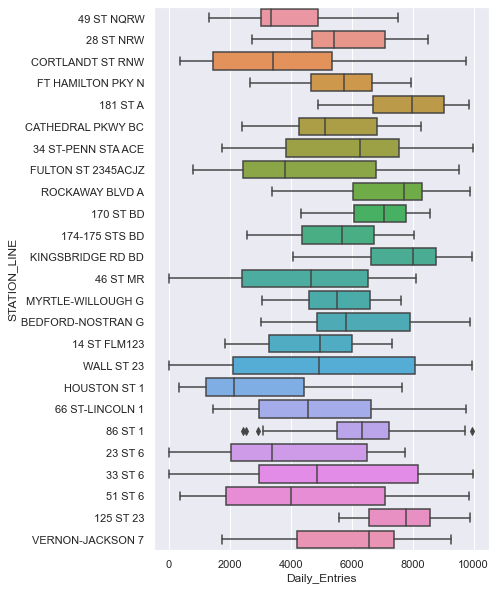

In [22]:
plt.figure(figsize = (6, 10))
sns.boxplot('Daily_Entries', 'STATION_LINE', data=stations_daily_top25)

## try to split by weekend and weekday traffic

In [23]:
stations_daily_top25_copy = stations_daily_top25.copy()

In [24]:
#make a new column thats a date time object to put day of the week
stations_daily_top25_copy['Dateobject'] = pd.to_datetime(stations_daily_top25_copy['DATE'], format='%m/%d/%Y')

In [25]:
stations_daily_top25_copy['Day_of_Week'] = stations_daily_top25_copy['Dateobject'].dt.dayofweek

In [26]:
stations_daily_top25_copy.head()

,C/A,UNIT,STATION,LINENAME,DATE,ENTRIES,EXITS,Previous_date,Previous_Entries,Daily_Entries,STATION_LINE,Dateobject,Day_of_Week
106,A013,R081,49 ST,NQRW,08/30/2020,152575761,307855750,08/29/2020,152572931.0,2830.0,49 ST NQRW,2020-08-30,6
107,A013,R081,49 ST,NQRW,08/31/2020,152578932,307861117,08/30/2020,152575761.0,3171.0,49 ST NQRW,2020-08-31,0
108,A013,R081,49 ST,NQRW,09/01/2020,152584490,307867719,08/31/2020,152578932.0,5558.0,49 ST NQRW,2020-09-01,1
109,A013,R081,49 ST,NQRW,09/02/2020,152590227,307874563,09/01/2020,152584490.0,5737.0,49 ST NQRW,2020-09-02,2
112,A013,R081,49 ST,NQRW,09/05/2020,152607649,307894332,09/04/2020,152602116.0,5533.0,49 ST NQRW,2020-09-05,5


In [27]:
weekdays_mask = (stations_daily_top25_copy['Day_of_Week'].isin([0,1,2,3,4]))

In [28]:
weekday_df = stations_daily_top25_copy[weekdays_mask]

In [29]:
weekend_mask = (stations_daily_top25_copy['Day_of_Week'].isin([5,6]))

In [30]:
weekend_df = stations_daily_top25_copy[weekend_mask]

In [31]:
weekday_graph_data = weekday_df.groupby('STATION_LINE')[['Daily_Entries']].sum().sort_values(['Daily_Entries'], ascending = True)
weekend_graph_data = weekend_df.groupby('STATION_LINE')[['Daily_Entries']].sum().sort_values(['Daily_Entries'], ascending = True)


In [32]:
weekday_graph_data

,Daily_Entries
STATION_LINE,
ROCKAWAY BLVD A,161678.0
BEDFORD-NOSTRAN G,162777.0
86 ST 1,166997.0
28 ST NRW,167633.0
181 ST A,172782.0
CATHEDRAL PKWY BC,173222.0
MYRTLE-WILLOUGH G,174390.0
66 ST-LINCOLN 1,176245.0
174-175 STS BD,177984.0


In [33]:
weekdayx = list(weekday_graph_data.index)
weekdayy = list(weekday_graph_data['Daily_Entries'])
weekendx = list(weekend_graph_data.index)
weekendy = list(weekend_graph_data['Daily_Entries'])

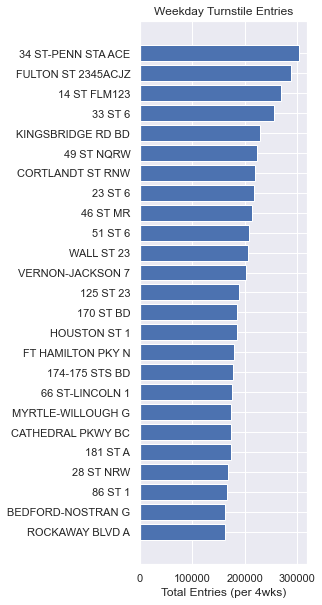

In [34]:
plt.figure(figsize=(3,10))
plt.xlabel('Total Entries (per 4wks)')
plt.title('Weekday Turnstile Entries')
plt.barh(weekdayx,weekdayy)
plt.savefig('weekday_plot.png', dpi=300, bbox_inches='tight');

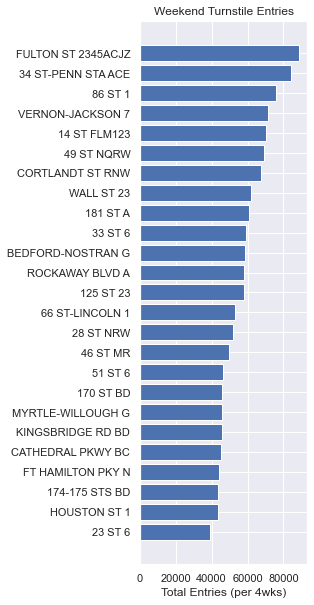

In [35]:
plt.figure(figsize=(3,10))
plt.xlabel('Total Entries (per 4wks)')
plt.title('Weekend Turnstile Entries')
plt.barh(weekendx,weekendy)
plt.savefig('weekend_plot.png', dpi=300, bbox_inches='tight');

#### look at the stations that have highest income by zip code

In [36]:
stations_w_income.head()

,STATION_LINE,Daily_Entries,STATION,LINENAME,zip_code,number_of_returns
0,34 ST-PENN STA ACE,387800,34 ST-PENN STA,ACE,10001,6370
1,28 ST NRW,219660,28 ST,NRW,10001,6370
2,FULTON ST 2345ACJZ,376692,FULTON ST,2345ACJZ,10038,4780
3,WALL ST 23,269157,WALL ST,23,10038,4780
4,14 ST FLM123,338837,14 ST,FLM123,10019,12120


In [57]:
income_graph_data = stations_w_income.groupby('STATION_LINE')[['number_of_returns']].sum().sort_values(['number_of_returns'], ascending = True)

In [58]:
income_graph_data

,number_of_returns
STATION_LINE,
174-175 STS BD,750
170 ST BD,780
KINGSBRIDGE RD BD,1230
33 ST 6,1280
51 ST 6,1280
ROCKAWAY BLVD A,1440
66 ST-LINCOLN 1,2140
181 ST A,2220
CORTLANDT ST RNW,2420


In [59]:
incomex = list(income_graph_data.index)
incomey = list(income_graph_data['number_of_returns'])

<BarContainer object of 25 artists>

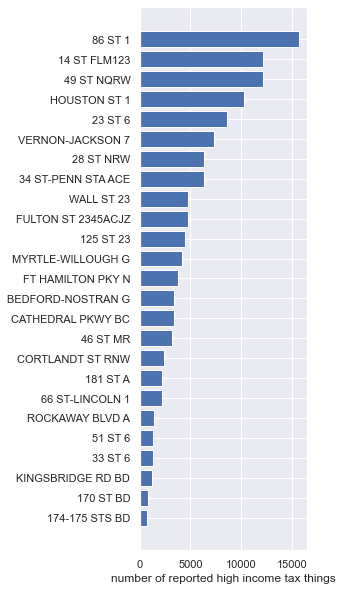

In [60]:
plt.figure(figsize=(3,10))
plt.xlabel('number of reported high income tax things')
#plt.title('Weekend Turnstile Entries')
plt.barh(incomex,incomey)
#plt.savefig('weekend_plot.png', dpi=300, bbox_inches='tight');


#plt.plot( , )

## SUGGESETIONS BY INCOME
(in order of busiest traffic and highest income)

**Weekend:**

86 ST 1

VERNON-JACKSON 7

49 ST NQRW

14 ST FLM123

34 ST-PENN STA ACE

28 ST NRW

**Weekday:**

34 ST-PENN STA ACE

14 ST FLM123

49 ST NQRW

FULTON ST 2345ACJZ

HOUSTON ST 1

28 ST NRW

86 ST 1

This is about 7, do we want more?

Also, as a sanity check, i ran the same analysis on data from the sept 2017, 2018, and 2019. The data was consistent from for all three years however it changed in 2020. It is quite possible the changes are due to covid. There is likely an impact on travel and being able to be in these certain areas that were previously high traffic.

### add charitable contribution

In [38]:
stations_charitable_donors.head()

,STATION_LINE,Daily_Entries_x,STATION,LINENAME,zipcode,zip_code,number_of_returns_charitable_contribution
0,34 ST-PENN STA ACE,387800,34 ST-PENN STA,ACE,10001,10001,1770
1,28 ST NRW,219660,28 ST,NRW,10001,10001,1770
2,FULTON ST 2345ACJZ,376692,FULTON ST,2345ACJZ,10038,10038,1320
3,WALL ST 23,269157,WALL ST,23,10038,10038,1320
4,14 ST FLM123,338837,14 ST,FLM123,10019,10019,3760


In [39]:
#clean up the df a bit
stations_charitable_donors = stations_charitable_donors.drop(columns = 'zipcode')
stations_charitable_donors = stations_charitable_donors.rename(columns = {'Daily_Entries_x': 'Daily_Entries'})


In [40]:
stations_charitable_donors.head()

,STATION_LINE,Daily_Entries,STATION,LINENAME,zip_code,number_of_returns_charitable_contribution
0,34 ST-PENN STA ACE,387800,34 ST-PENN STA,ACE,10001,1770
1,28 ST NRW,219660,28 ST,NRW,10001,1770
2,FULTON ST 2345ACJZ,376692,FULTON ST,2345ACJZ,10038,1320
3,WALL ST 23,269157,WALL ST,23,10038,1320
4,14 ST FLM123,338837,14 ST,FLM123,10019,3760


In [61]:
stations_charitable_donors = stations_charitable_donors.groupby('STATION_LINE')[['number_of_returns_charitable_contribution']].sum().sort_values(['number_of_returns_charitable_contribution'], ascending = True)


In [62]:
donorx = list(stations_charitable_donors.index)
donory = list(stations_charitable_donors['number_of_returns_charitable_contribution'])

<BarContainer object of 25 artists>

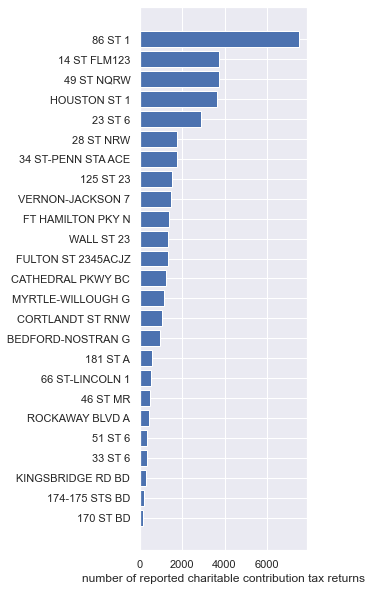

In [64]:
plt.figure(figsize=(3,10))
plt.xlabel('number of reported charitable contribution tax returns')
#plt.title('Weekend Turnstile Entries')
plt.barh(donorx,donory)
#plt.savefig('weekend_plot.png', dpi=300, bbox_inches='tight');


#plt.plot( , )